# Bay Area Bike Share Analysis

## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use an iPython notebook.

[Bay Area Bike Share](http://www.bayareabikeshare.com/) is a company that provides on-demand bike rentals for customers in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city. Users pay for the service either through a yearly subscription or by purchasing 3-day or 24-hour passes. Users can make an unlimited number of trips, with trips under thirty minutes in length having no additional charge; longer trips will incur overtime fees.

In this project, you will put yourself in the shoes of a data analyst performing an exploratory analysis on the data. You will take a look at two of the major parts of the data analysis process: data wrangling and exploratory data analysis. But before you even start looking at data, think about some questions you might want to understand about the bike share data. Consider, for example, if you were working for Bay Area Bike Share: what kinds of information would you want to know about in order to make smarter business decisions? Or you might think about if you were a user of the bike share service. What factors might influence how you would want to use the service?

**Question 1**: Write at least two questions you think could be answered by data.

**Answer**: If I were working for Bay Area Bike Share, I would like to know: 
1. Which stations are most used by users as a starting point of the day?
2. Which stations are most used by users as a ending point of the day?
3. Which stations are most used by users as intermediate points between the initial station and the final station of the day?
4. From a station's point of view, what are the most common arrivel stations (next stop)? And what is the average time spent on the route?
5. How many users perform one, two, ..., N intermediate stops between the starting station and the final station?
6. How many times per day and per month a station with a vacancy has received a bike?
7. How many times per day and per month a station with one or more bikes had one bike withdrawal?

With that informations, one can find out which are the stations with the highest inactivity during the day/month and which are the ones with the highest activity. This can help in deciding which stations can be inactivated and which stations can be extended or have the support of new stations nearby.

If I were a user of the bike share service, I would like to know:
8. The location of the stations that are near the path that I want to go through and the amount of bikes available in those stations.
9. What hours of the day there are more bikes available in the stations that are near the path that I want to go through?

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options. You will learn more about Markdown later in the Nanodegree Program. Hit **Shift** + **Enter** or **Shift** + **Return**.

## Using Visualizations to Communicate Findings in Data

As a data analyst, the ability to effectively communicate findings is a key part of the job. After all, your best analysis is only as good as your ability to communicate it.

In 2014, Bay Area Bike Share held an [Open Data Challenge](http://www.bayareabikeshare.com/datachallenge-2014) to encourage data analysts to create visualizations based on their open data set. You’ll create your own visualizations in this project, but first, take a look at the [submission winner for Best Analysis](http://thfield.github.io/babs/index.html) from Tyler Field. Read through the entire report to answer the following question:

**Question 2**: What visualizations do you think provide the most interesting insights? Are you able to answer either of the questions you identified above based on Tyler’s analysis? Why or why not?

**Answer**: In my opinion, the visualizations with most interesting insights are most popular starting and ending stations and the interactive chart that crosses information about time, cities, type of users, important dates and weather informations. The inverted pyramid visualization of most popular starting and ending stations shows a ranking of stations usage. In a quick way, it is possible to relate the most and least used stations. In addition, it is possible to compare how much one station is more or less used than the other. Already with the interactive cross chart is possible several analyzes can be performed. Already with the interactive cross chart, it is possible to establish cause and effect relationships between the amount of use of the bicycle service and the weather, holidays, weekends and events. Moreover, it is possible to compare these relationships between the cities where the service is offered.

Based on Tyler’s analysis is it possible answer only part of my questions. Questions 1, 2 and 4 were explicitly answered in "Most Popular Starting Stations", "Most Popular Destinations" and heatmap diagram of systemwide rides, respectively. But the other questions are not answered directly by Tyler's analysis. The reason for this is that these questions are more specific than those elaborated by Tyler. My purpose with these questions is to try to find out which are the stations with the highest inactivity during the day/month and which are the ones with the highest activity. That is one dimension not explored in Tyler's analysis.

It is perceived that data analysis is a subjective task. An analyst thinks differently from one another to solve the same problem with the same mass of data. But their analyzes can complement each other and help to propose new questions and new analyzes.

## Data Wrangling

Now it's time to explore the data for yourself. Year 1 and Year 2 data from the Bay Area Bike Share's [Open Data](http://www.bayareabikeshare.com/open-data) page have already been provided with the project materials; you don't need to download anything extra. The data comes in three parts: the first half of Year 1 (files starting `201402`), the second half of Year 1 (files starting `201408`), and all of Year 2 (files starting `201508`). There are three main datafiles associated with each part: trip data showing information about each trip taken in the system (`*_trip_data.csv`), information about the stations in the system (`*_station_data.csv`), and daily weather data for each city in the system (`*_weather_data.csv`).

When dealing with a lot of data, it can be useful to start by working with only a sample of the data. This way, it will be much easier to check that our data wrangling steps are working since our code will take less time to complete. Once we are satisfied with the way things are working, we can then set things up to work on the dataset as a whole.

Since the bulk of the data is contained in the trip information, we should target looking at a subset of the trip data to help us get our bearings. You'll start by looking at only the first month of the bike trip data, from 2013-08-29 to 2013-09-30. The code below will take the data from the first half of the first year, then write the first month's worth of data to an output file. This code exploits the fact that the data is sorted by date (though it should be noted that the first two days are sorted by trip time, rather than being completely chronological).

First, load all of the packages and functions that you'll be using in your analysis by running the first code cell below. Then, run the second code cell to read a subset of the first trip data file, and write a new file containing just the subset we are initially interested in.

> **Tip**: You can run a code cell like you formatted Markdown cells by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [1]:
# import all necessary packages and functions.
import csv
from datetime import datetime
import numpy as np
import pandas as pd
from babs_datacheck import question_3
from babs_visualizations import usage_stats, usage_plot, filter_data
from IPython.display import display
%matplotlib inline

In [2]:
# file locations
file_in  = '201402_trip_data.csv'
file_out = '201309_trip_data.csv'

with open(file_out, 'w') as f_out, open(file_in, 'r') as f_in:
    # set up csv reader and writer objects
    in_reader = csv.reader(f_in)
    out_writer = csv.writer(f_out)

    # write rows from in-file to out-file until specified date reached
    while True:
        datarow = next(in_reader)
        # trip start dates in 3rd column, m/d/yyyy HH:MM formats
        if datarow[2][:9] == '10/1/2013':
            break
        out_writer.writerow(datarow)

### Condensing the Trip Data

The first step is to look at the structure of the dataset to see if there's any data wrangling we should perform. The below cell will read in the sampled data file that you created in the previous cell, and print out the first few rows of the table.

In [3]:
sample_data = pd.read_csv('201309_trip_data.csv')

display(sample_data.head())

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In this exploration, we're going to concentrate on factors in the trip data that affect the number of trips that are taken. Let's focus down on a few selected columns: the trip duration, start time, start terminal, end terminal, and subscription type. Start time will be divided into year, month, and hour components. We will also add a column for the day of the week and abstract the start and end terminal to be the start and end _city_.

Let's tackle the lattermost part of the wrangling process first. Run the below code cell to see how the station information is structured, then observe how the code will create the station-city mapping. Note that the station mapping is set up as a function, `create_station_mapping()`. Since it is possible that more stations are added or dropped over time, this function will allow us to combine the station information across all three parts of our data when we are ready to explore everything.

In [4]:
# Display the first few rows of the station data file.
station_info = pd.read_csv('201402_station_data.csv')
display(station_info.head())

# This function will be called by another function later on to create the mapping.
def create_station_mapping(station_data):
    """
    Create a mapping from station IDs to cities, returning the
    result as a dictionary.
    """
    station_map = {}
    for data_file in station_data:
        with open(data_file, 'r') as f_in:
            # set up csv reader object - note that we are using DictReader, which
            # takes the first row of the file as a header row for each row's
            # dictionary keys
            weather_reader = csv.DictReader(f_in)

            for row in weather_reader:
                station_map[row['station_id']] = row['landmark']
    return station_map

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


You can now use the mapping to condense the trip data to the selected columns noted above. This will be performed in the `summarise_data()` function below. As part of this function, the `datetime` module is used to **p**arse the timestamp strings from the original data file as datetime objects (`strptime`), which can then be output in a different string **f**ormat (`strftime`). The parsed objects also have a variety of attributes and methods to quickly obtain

There are two tasks that you will need to complete to finish the `summarise_data()` function. First, you should perform an operation to convert the trip durations from being in terms of seconds to being in terms of minutes. (There are 60 seconds in a minute.) Secondly, you will need to create the columns for the year, month, hour, and day of the week. Take a look at the [documentation for datetime objects in the datetime module](https://docs.python.org/2/library/datetime.html#datetime-objects). **Find the appropriate attributes and method to complete the below code.**

In [5]:
def summarise_data(trip_in, station_data, trip_out):
    """
    This function takes trip and station information and outputs a new
    data file with a condensed summary of major trip information. The
    trip_in and station_data arguments will be lists of data files for
    the trip and station information, respectively, while trip_out
    specifies the location to which the summarized data will be written.
    """
    # generate dictionary of station - city mapping
    station_map = create_station_mapping(station_data)
    
    with open(trip_out, 'w') as f_out:
        # set up csv writer object        
        out_colnames = ['duration', 'start_date', 'start_year',
                        'start_month', 'start_hour', 'end_hour', 'weekday',
                        'start_city', 'end_city', 'subscription_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        for data_file in trip_in:
            with open(data_file, 'r') as f_in:
                # set up csv reader object
                trip_reader = csv.DictReader(f_in)

                # collect data from and process each row
                for row in trip_reader:
                    new_point = {}
                    
                    # convert duration units from seconds to minutes
                    ### Question 3a: Add a mathematical operation below   ###
                    ### to convert durations from seconds to minutes.     ###
                    new_point['duration'] = float(row['Duration']) / 60   # divided by 60 for convert 
                                                                          # seconds to minutes
                    
                    # reformat datestrings into multiple columns
                    ### Question 3b: Fill in the blanks below to generate ###
                    ### the expected time values.                         ###
                    trip_start_date = datetime.strptime(row['Start Date'], '%m/%d/%Y %H:%M')
                    new_point['start_date']  = trip_start_date.strftime('%Y-%m-%d')
                    new_point['start_year']  = trip_start_date.strftime('%Y')
                    new_point['start_month'] = trip_start_date.strftime('%m')
                    new_point['start_hour']  = trip_start_date.strftime('%H')
                    new_point['weekday']     = trip_start_date.strftime('%w')
                    
                    trip_end_date = datetime.strptime(row['End Date'], '%m/%d/%Y %H:%M')
                    new_point['end_hour']  = trip_end_date.strftime('%H')
                    
                    # remap start and end terminal with start and end city
                    new_point['start_city'] = station_map[row['Start Terminal']]
                    new_point['end_city'] = station_map[row['End Terminal']]
                    # two different column names for subscribers depending on file
                    if 'Subscription Type' in row:
                        new_point['subscription_type'] = row['Subscription Type']
                    else:
                        new_point['subscription_type'] = row['Subscriber Type']

                    # write the processed information to the output file.
                    trip_writer.writerow(new_point)

**Question 3**: Run the below code block to call the `summarise_data()` function you finished in the above cell. It will take the data contained in the files listed in the `trip_in` and `station_data` variables, and write a new file at the location specified in the `trip_out` variable. If you've performed the data wrangling correctly, the below code block will print out the first few lines of the dataframe and a message verifying that the data point counts are correct.

In [6]:
# Process the data by running the function we wrote above.
station_data = ['201402_station_data.csv']
trip_in = ['201309_trip_data.csv']
trip_out = '201309_trip_summary.csv'
summarise_data(trip_in, station_data, trip_out)

# Load in the data file and print out the first few rows
sample_data = pd.read_csv(trip_out)
display(sample_data.head())

# Verify the dataframe by counting data points matching each of the time features.
question_3(sample_data)

,duration,start_date,start_year,start_month,start_hour,end_hour,weekday,start_city,end_city,subscription_type
0,1.050000,2013-08-29,2013,8,14,14,4,San Francisco,San Francisco,Subscriber
1,1.166667,2013-08-29,2013,8,14,14,4,San Jose,San Jose,Subscriber
2,1.183333,2013-08-29,2013,8,10,10,4,Mountain View,Mountain View,Subscriber
3,1.283333,2013-08-29,2013,8,11,11,4,San Jose,San Jose,Subscriber
4,1.383333,2013-08-29,2013,8,12,12,4,San Francisco,San Francisco,Subscriber


All counts are as expected!


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

## Exploratory Data Analysis

Now that you have some data saved to a file, let's look at some initial trends in the data. Some code has already been written for you in the `babs_visualizations.py` script to help summarize and visualize the data; this has been imported as the functions `usage_stats()` and `usage_plot()`. In this section we'll walk through some of the things you can do with the functions, and you'll use the functions for yourself in the last part of the project. First, run the following cell to load the data, then use the `usage_stats()` function to see the total number of trips made in the first month of operations, along with some statistics regarding how long trips took.

In [7]:
trip_data = pd.read_csv('201309_trip_summary.csv')

usage_stats(trip_data)

There are 27345 data points in the dataset.
The average duration of trips is 27.60 minutes.
The median trip duration is 10.72 minutes.
25% of trips are shorter than 6.82 minutes.
25% of trips are longer than 17.28 minutes.


array([ 6.81666667, 10.71666667, 17.28333333])

You should see that there are over 27,000 trips in the first month, and that the average trip duration is larger than the median trip duration (the point where 50% of trips are shorter, and 50% are longer). In fact, the mean is larger than the 75% shortest durations. This will be interesting to look at later on.

Let's start looking at how those trips are divided by subscription type. One easy way to build an intuition about the data is to plot it. We'll use the `usage_plot()` function for this. The second argument of the function allows us to count up the trips across a selected variable, displaying the information in a plot. The expression below will show how many customer and how many subscriber trips were made. Try it out!

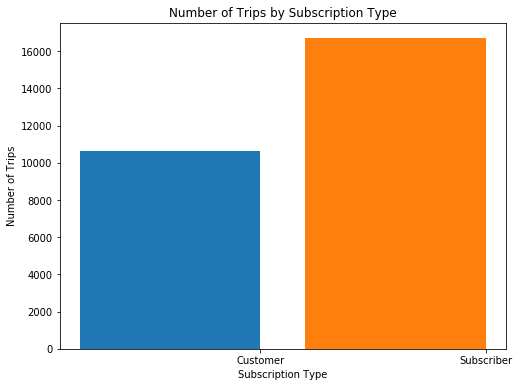

In [8]:
usage_plot(trip_data, 'subscription_type')

Seems like there's about 50% more trips made by subscribers in the first month than customers. Let's try a different variable now. What does the distribution of trip durations look like?

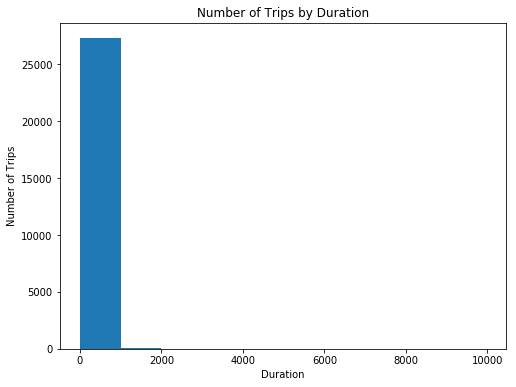

In [9]:
usage_plot(trip_data, 'duration')

Looks pretty strange, doesn't it? Take a look at the duration values on the x-axis. Most rides are expected to be 30 minutes or less, since there are overage charges for taking extra time in a single trip. The first bar spans durations up to about 1000 minutes, or over 16 hours. Based on the statistics we got out of `usage_stats()`, we should have expected some trips with very long durations that bring the average to be so much higher than the median: the plot shows this in a dramatic, but unhelpful way.

When exploring the data, you will often need to work with visualization function parameters in order to make the data easier to understand. Here's where the third argument of the `usage_plot()` function comes in. Filters can be set for data points as a list of conditions. Let's start by limiting things to trips of less than 60 minutes.

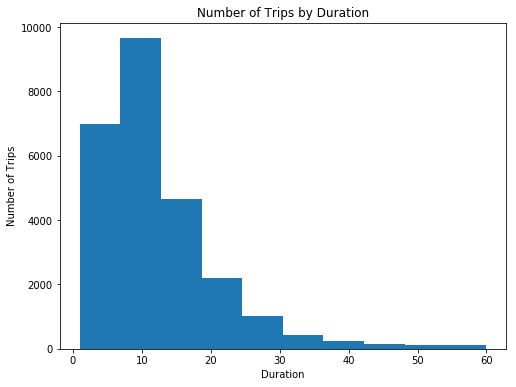

In [10]:
usage_plot(trip_data, 'duration', ['duration < 60'])

This is looking better! You can see that most trips are indeed less than 30 minutes in length, but there's more that you can do to improve the presentation. Since the minimum duration is not 0, the left hand bar is slighly above 0. We want to be able to tell where there is a clear boundary at 30 minutes, so it will look nicer if we have bin sizes and bin boundaries that correspond to some number of minutes. Fortunately, you can use the optional "boundary" and "bin_width" parameters to adjust the plot. By setting "boundary" to 0, one of the bin edges (in this case the left-most bin) will start at 0 rather than the minimum trip duration. And by setting "bin_width" to 5, each bar will count up data points in five-minute intervals.

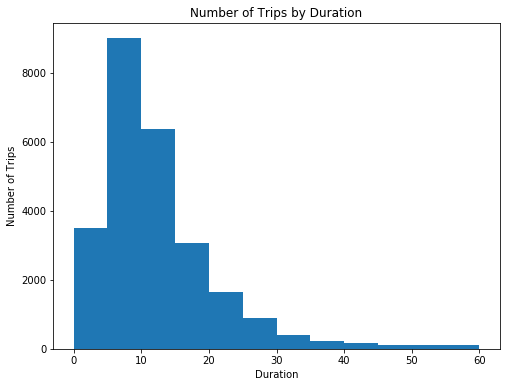

In [11]:
usage_plot(trip_data, 'duration', ['duration < 60'], boundary = 0, bin_width = 5)

**Question 4**: Which five-minute trip duration shows the most number of trips? Approximately how many trips were made in this range?

**Answer**: The second five-minute (5 min to 10 min) trip duration concentrates the most number of trips, approximately, 9400 trips.

Visual adjustments like this might be small, but they can go a long way in helping you understand the data and convey your findings to others.

## Performing Your Own Analysis

Now that you've done some exploration on a small sample of the dataset, it's time to go ahead and put together all of the data in a single file and see what trends you can find. The code below will use the same `summarise_data()` function as before to process data. After running the cell below, you'll have processed all the data into a single data file. Note that the function will not display any output while it runs, and this can take a while to complete since you have much more data than the sample you worked with above.

In [12]:
station_data = ['201402_station_data.csv',
                '201408_station_data.csv',
                '201508_station_data.csv' ]
trip_in = ['201402_trip_data.csv',
           '201408_trip_data.csv',
           '201508_trip_data.csv' ]
trip_out = 'babs_y1_y2_summary.csv'

# This function will take in the station data and trip data and
# write out a new data file to the name listed above in trip_out.
summarise_data(trip_in, station_data, trip_out)

Since the `summarise_data()` function has created a standalone file, the above cell will not need to be run a second time, even if you close the notebook and start a new session. You can just load in the dataset and then explore things from there.

In [13]:
trip_data = pd.read_csv('babs_y1_y2_summary.csv')
display(trip_data.head())

,duration,start_date,start_year,start_month,start_hour,end_hour,weekday,start_city,end_city,subscription_type
0,1.050000,2013-08-29,2013,8,14,14,4,San Francisco,San Francisco,Subscriber
1,1.166667,2013-08-29,2013,8,14,14,4,San Jose,San Jose,Subscriber
2,1.183333,2013-08-29,2013,8,10,10,4,Mountain View,Mountain View,Subscriber
3,1.283333,2013-08-29,2013,8,11,11,4,San Jose,San Jose,Subscriber
4,1.383333,2013-08-29,2013,8,12,12,4,San Francisco,San Francisco,Subscriber


#### Now it's your turn to explore the new dataset with `usage_stats()` and `usage_plot()` and report your findings! Here's a refresher on how to use the `usage_plot()` function:
- first argument (required): loaded dataframe from which data will be analyzed.
- second argument (required): variable on which trip counts will be divided.
- third argument (optional): data filters limiting the data points that will be counted. Filters should be given as a list of conditions, each element should be a string in the following format: `'<field> <op> <value>'` using one of the following operations: >, <, >=, <=, ==, !=. Data points must satisfy all conditions to be counted or visualized. For example, `["duration < 15", "start_city == 'San Francisco'"]` retains only trips that originated in San Francisco and are less than 15 minutes long.

If data is being split on a numeric variable (thus creating a histogram), some additional parameters may be set by keyword.
- "n_bins" specifies the number of bars in the resultant plot (default is 10).
- "bin_width" specifies the width of each bar (default divides the range of the data by number of bins). "n_bins" and "bin_width" cannot be used simultaneously.
- "boundary" specifies where one of the bar edges will be placed; other bar edges will be placed around that value (this may result in an additional bar being plotted). This argument may be used alongside the "n_bins" and "bin_width" arguments.

You can also add some customization to the `usage_stats()` function as well. The second argument of the function can be used to set up filter conditions, just like how they are set up in `usage_plot()`.

## Question 5

It following is my analysis to answer questions ***5a*** and ***5b***.

### New funcion

Based on source code of `usage_stats()` I created the `usage_percent()` function to help me report the percentage of number of trips for data points that meet specified filtering criteria. I used it to calculate the percentage of users who exceeded 30 minutes.

In [14]:
def usage_percent(data, filters = []):
    """
    Report the percentage of number of trips for data points that meet
    specified filtering criteria.
    """

    n_data_all = data.shape[0]

    # Apply filters to data
    for condition in filters:
        data = filter_data(data, condition)

    # Compute number of data points that met the filter criteria.
    n_data = data.shape[0]
    
    return '{:.2f}% of data ({:d} of {:d}) matching the filter criteria.'.format(100. * n_data / n_data_all, n_data, n_data_all)

### Subscription Type Behavior

First, let's look at the plot and stats about subscription type.

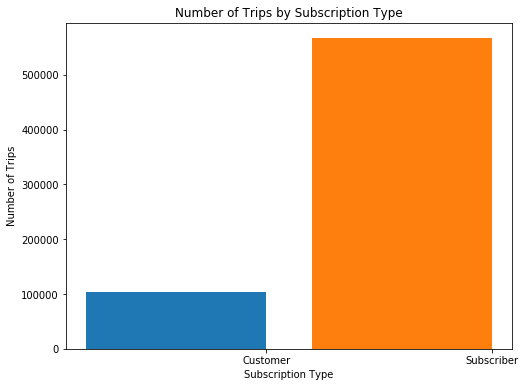

In [15]:
usage_plot(trip_data, "subscription_type")

***Subscriber***

In [16]:
subscriber_trip_data = filter_data(trip_data, "subscription_type == 'Subscriber'")
usage_stats(subscriber_trip_data)

There are 566746 data points in the dataset.
The average duration of trips is 9.83 minutes.
The median trip duration is 7.93 minutes.
25% of trips are shorter than 5.38 minutes.
25% of trips are longer than 11.10 minutes.


array([ 5.38333333,  7.93333333, 11.1       ])

***Customer***

In [17]:
customer_trip_data = filter_data(trip_data, "subscription_type == 'Customer'")
usage_stats(customer_trip_data)

There are 103213 data points in the dataset.
The average duration of trips is 65.86 minutes.
The median trip duration is 18.60 minutes.
25% of trips are shorter than 10.97 minutes.
25% of trips are longer than 38.82 minutes.


array([10.96666667, 18.6       , 38.81666667])

We can see by the plot and stats above that Subscribers are overwhelming majority. They represent, approximately, 85% of all bike users.

Analyzing the average and the median of duration on stats information, we can observe that for the Subscribers both are close while for the Customers both are distant. That shows that most of the Subscribers data are more contained and close to the median (central data) while the Customers data are more sparse, but concentrated under 38.82 minutes (1º, 2º and 3º quartile). To facilitate understanding, let's see the next two plots of number of trips by duration (under 2 hours).

***Subscribers***

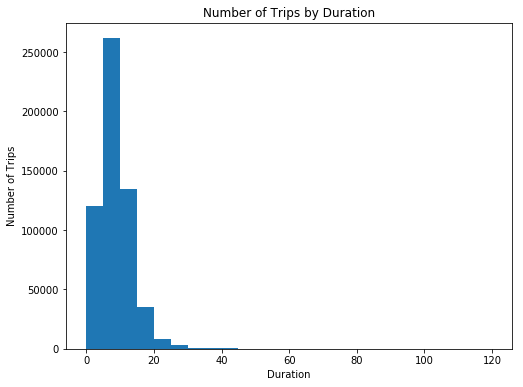

In [18]:
usage_plot(subscriber_trip_data, "duration", ["duration < 120"], boundary = 0, bin_width = 5)

***Customers*** 

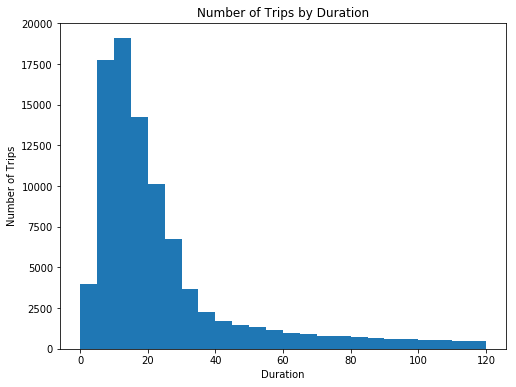

In [19]:
usage_plot(customer_trip_data, "duration", ["duration < 120"], boundary = 0, bin_width = 5)

From the two plots above, we can see that most of the Subscribers and most Customers use one bike within the first 30 minutes (free of fees) and Customers exceed 30 minutes more than Subscribers.

Calculating the percentage of users that exceeded 30 minutes...

In [20]:
print("Subscribers: " + usage_percent(subscriber_trip_data, ["duration > 30"]))
print("Customers: " + usage_percent(customer_trip_data, ["duration > 30"]))

Subscribers: 0.67% of data (3808 of 566746) matching the filter criteria.
Customers: 30.29% of data (31267 of 103213) matching the filter criteria.


We will see that 30.29% of Customers exceeded the threshold while 0.67% of Subscribers did that. The percentage of charged Customers is high. Many Customers do not know how to use the service.

From the two plots below we can see that weekday Customers exceed 30 minutes less than weekend Customers. Perhaps, because of the initial inexperience of Customers and these use the service for the first time on weekends. 

***Customers that did not exceed 30 minutes***

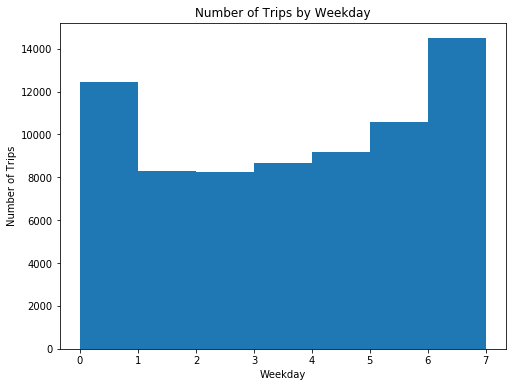

In [21]:
usage_plot(customer_trip_data, "weekday", ["duration <= 30"], boundary = 0, bin_width = 1)

***Customers that exceeded 30 minutes***

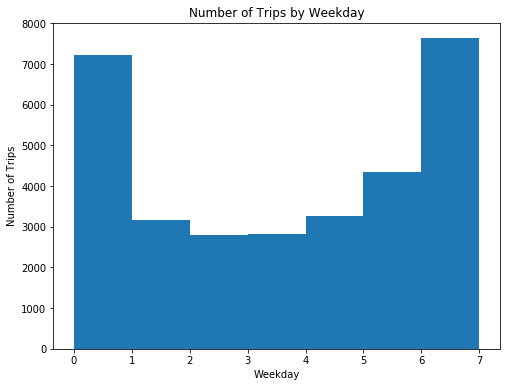

In [22]:
usage_plot(customer_trip_data, "weekday", ["duration > 30"], boundary = 0, bin_width = 1)

Looking at two plots above we can note thar Customers are weekend users (0 = Sunday and 6 = Saturday). By contrast, Subscribers are weekday users (1 = Monday, 2 = Tuesday, 3 = Wednesday, 4 = Thursday, 5 = Friday). Look at plot below. 

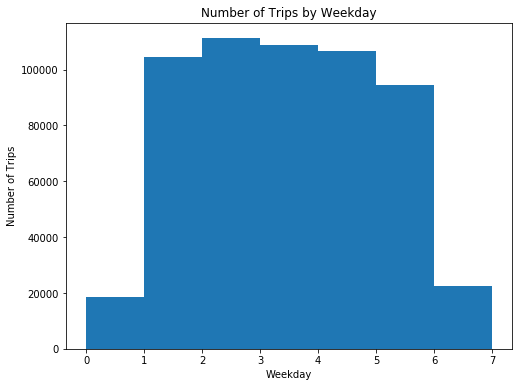

In [23]:
usage_plot(subscriber_trip_data, "weekday", boundary = 0, bin_width = 1)

As on days of week, Subscribers and Customers seem to take turns in the use of bikes for the hours of the day.

Subscribres usually pick up bikes between 7:00h and 9:00h (begin of work) and between 16:00h and 18:00h (end of work)

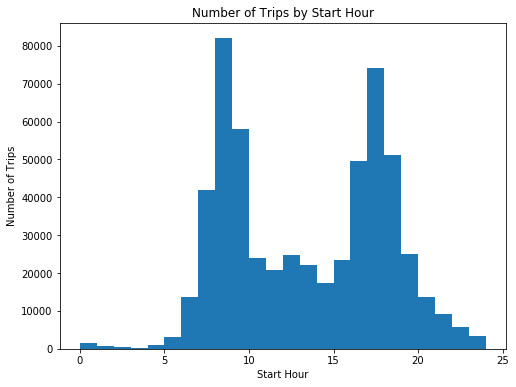

In [24]:
usage_plot(subscriber_trip_data, "start_hour", boundary = 0, bin_width = 1)

Whereas, Customers usually pick up bikes more between 12:00h and 16:00h. See it at plot below.

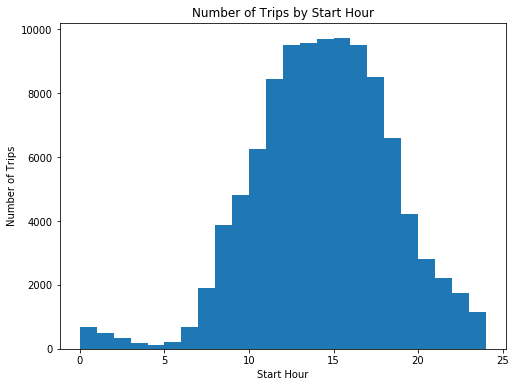

In [25]:
usage_plot(customer_trip_data, "start_hour", boundary = 0, bin_width = 1)

In terms of month of year, Subscribers have used the service homogeneously throughout the year, only decreasing in the last two months of year. While the Customers use the service more in the months between July and October. Look at two plots below.

***Subscribers***

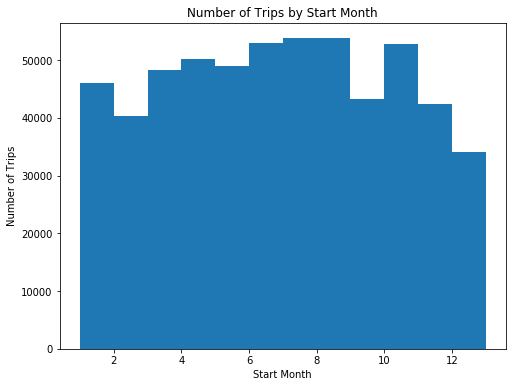

In [26]:
usage_plot(subscriber_trip_data, "start_month", boundary = 0, bin_width = 1)

***Customers***

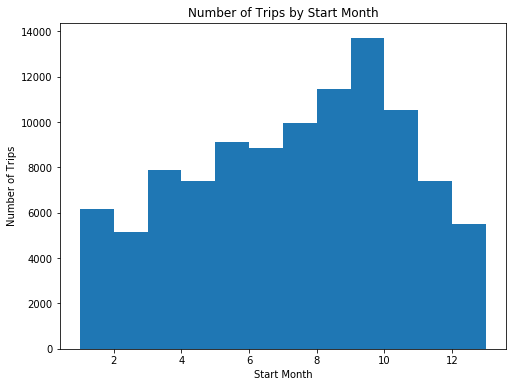

In [27]:
usage_plot(customer_trip_data, "start_month", boundary = 0, bin_width = 1)

Explore some different variables using the functions above and take note of some trends you find. Feel free to create additional cells if you want to explore the dataset in other ways or multiple ways.

> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

One you're done with your explorations, copy the two visualizations you found most interesting into the cells below, then answer the following questions with a few sentences describing what you found and why you selected the figures. Make sure that you adjust the number of bins or the bin limits so that they effectively convey data findings. Feel free to supplement this with any additional numbers generated from `usage_stats()` or place multiple visualizations to support your observations.


Customers:


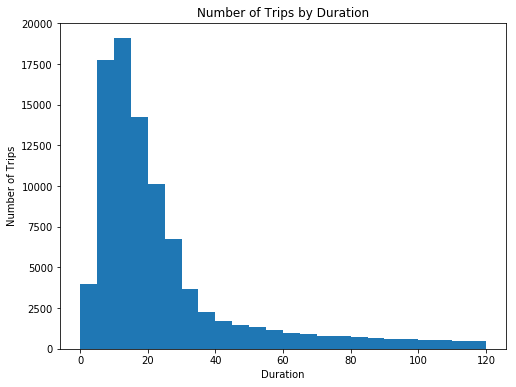

Customers who trip over 30 minutes: 30.29% of data (31267 of 103213) matching the filter criteria.


In [28]:
# Final Plot 1

# Customers: number of trip by duration
print("\nCustomers:")
usage_plot(customer_trip_data, "duration", ["duration < 120"], boundary = 0, bin_width = 5)

# Overtime data
print("Customers who trip over 30 minutes: " + usage_percent(customer_trip_data, ["duration > 30"]))

**Question 5a**: What is interesting about the above visualization? Why did you select it?

**Answer**: The interesting about two visualization above is the we can see that Customers exceed 30 minutes (free of fees) more than Subscribers and 30.24% of Customers exceeded the threshold while 0.67% of Subscribers did that. The percentage of charged Customers is high. Many Customers do not know how to use the service.

I chose these visualizations and percentages because they show that the service owner should take action to better guide their Customer users about how bike rental works.  


Customers who trip over 30 minutes:


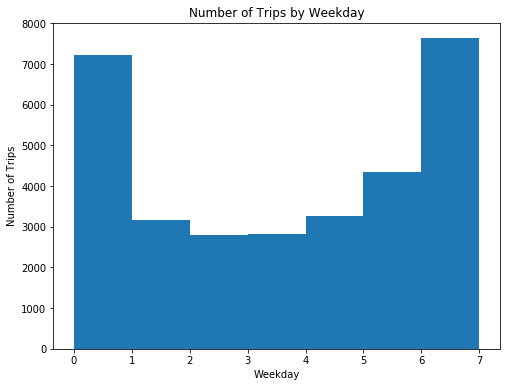

In [29]:
# Final Plot 2

print("\nCustomers who trip over 30 minutes:")
usage_plot(customer_trip_data, "weekday", ["duration > 30"], boundary = 0, bin_width = 1)

**Question 5b**: What is interesting about the above visualization? Why did you select it?

**Answer**: The interesting about above visualization is that Customers who trip over 30 minutes are, in the most, weekend users (0 = Sunday and 6 = Saturday).

I chose this visualization because it complements the previus visualization (Question 5a) and assists in decision making to solve the problem. For example, isention of first charge to Customer users on the weekend and notification to educate them and prevent recurrences.  

## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about our data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the code given. Instead of just looking at number of trips on the outcome axis, you could see what features affect things like trip duration. We also haven't looked at how the weather data ties into bike usage.

**Question 6**: Think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: Currently, I'm work at a university. I see many fields where I could apply data science techniques. In the academic field, we could find patterns about classes absences, disapprovals, courses withdrawals in order to solve these problems. In the human resource field, we could find patterns about salary, working day, vacations, absences, people reallocations. In the administrative field, we could find patterns about purchasing, warehouse, procedural protocol, assets management among others.

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.